**Consumer Theory for Cheap Information**

My job market paper considers the substitutability between different information sources at large sample size---that is, when information is sufficiently cheap and/or budgets are sufficiently large. This file illustrates the main results using Python.

# Code setup

First, we need to import a number of standard Python packages:

In [ ]:
import numpy as np                   # Basic array stuff
import scipy.optimize as optim       # For finding function mins
from scipy.stats import multinomial, norm, skewnorm # Multinomial probability computation
import matplotlib.pyplot as plt      # Plotting
from matplotlib import rc
from tabulate import tabulate        # For nicer printing of some data

In [ ]:
fig = plt.figure(figsize=(8,4), dpi=1000)
# set matching font
fontProperties = {'family':'serif','serif':['Times'],
    'weight' : 'normal', 'size' : 12}
rc('text', usetex=True)
rc('font',**fontProperties)
ax = fig.add_subplot(1,1,1)
ax.set_xlim((0, 2))
ax.set_ylim((0, 1))
ax.set_xlabel('Quantity from Source 1')
ax.set_ylabel('Quantity from Source 2')
ax.set_xticks([])
ax.set_yticks([])

dx = 0.001
x = np.arange(0,4,dx)
y1 = (0.25*(1-(x**2/5)))**(1/2)-0.25
y2 = (0.5*(1-(x**2/(1.5**2))))**(1/2)-0.3
y3 = 1.5*((2-((x+0.5)**2/0.25)))**(1/2)-0.15
ax.plot(x, y1, '--k', linewidth=1.2);
ax.plot(x, y2, '--k', linewidth=1.2);
ax.plot(x, y3, '--k', linewidth=1.2);
ax.plot(x[1090:2000], y1[1090:2000], 'k', linewidth=2.5);
ax.plot(x[183:1080], y2[183:1080], 'k', linewidth=2.5);
ax.plot(x[:183], y3[:183], 'k', linewidth=2.5);

plt.savefig('figqualitative.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0)

<ipython-input-4-4792661eaac5>:17: RuntimeWarning: invalid value encountered in sqrt
  y1 = (0.25*(1-(x**2/5)))**(1/2)-0.25
<ipython-input-4-4792661eaac5>:18: RuntimeWarning: invalid value encountered in sqrt
  y2 = (0.5*(1-(x**2/(1.5**2))))**(1/2)-0.3
<ipython-input-4-4792661eaac5>:19: RuntimeWarning: invalid value encountered in sqrt
  y3 = 1.5*((2-((x+0.5)**2/0.25)))**(1/2)-0.15


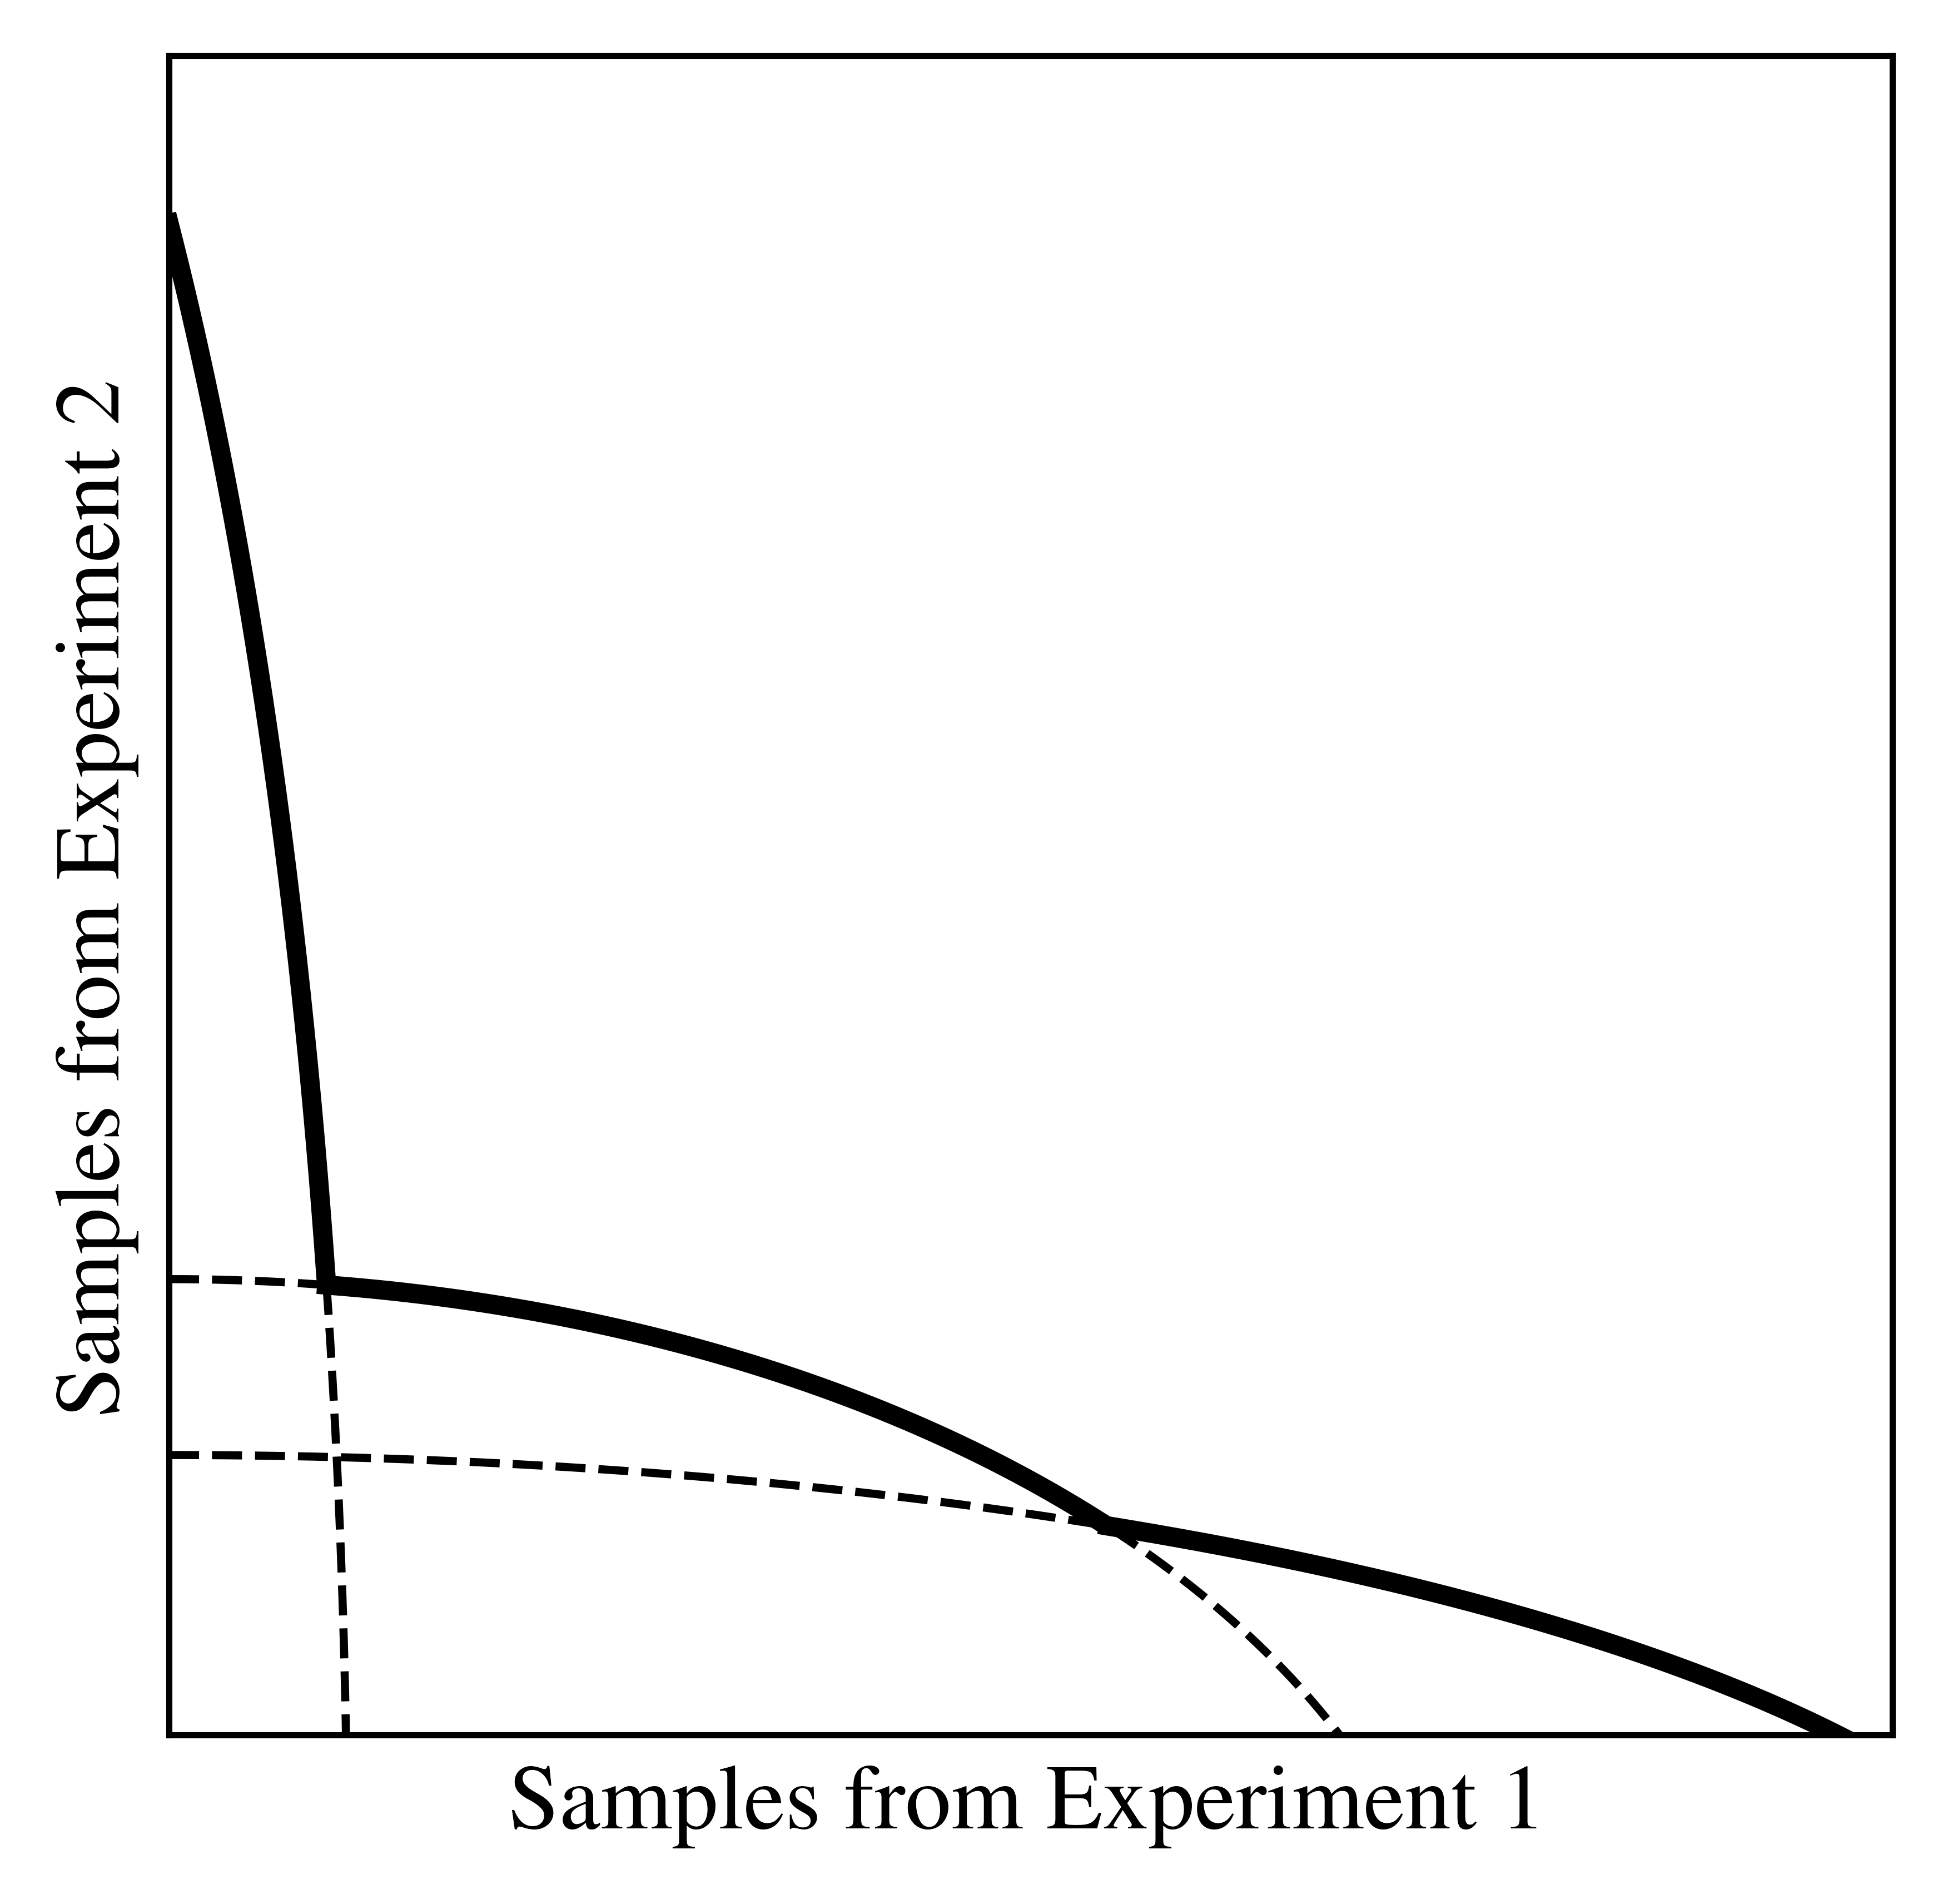

In [4]:
fig = plt.figure(figsize=(4,4), dpi=1000)
# set matching font
fontProperties = {'family':'serif','serif':['Times'],
    'weight' : 'normal', 'size' : 12}
rc('text', usetex=True)
rc('font',**fontProperties)
ax = fig.add_subplot(1,1,1)
ax.set_xlim((0, 2))
ax.set_ylim((0, 1.5))
ax.set_xlabel('Quantity from Experiment 1')
ax.set_ylabel('Quantity from Experiment 2')
ax.set_xticks([])
ax.set_yticks([])

dx = 0.001
x = np.arange(0,4,dx)
y1 = (0.25*(1-(x**2/5)))**(1/2)-0.25
y2 = (0.5*(1-(x**2/(1.5**2))))**(1/2)-0.3
y3 = 1.5*((2-((x+0.5)**2/0.25)))**(1/2)-0.15
ax.plot(x, y1, '--k', linewidth=1.05);
ax.plot(x, y2, '--k', linewidth=1.05);
ax.plot(x, y3, '--k', linewidth=1.05);
ax.plot(x[1090:2000], y1[1090:2000], 'k', linewidth=2.5);
ax.plot(x[183:1080], y2[183:1080], 'k', linewidth=2.5);
ax.plot(x[:183], y3[:183], 'k', linewidth=2.5);

plt.savefig('figqualitativepres.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0,transparent=True)

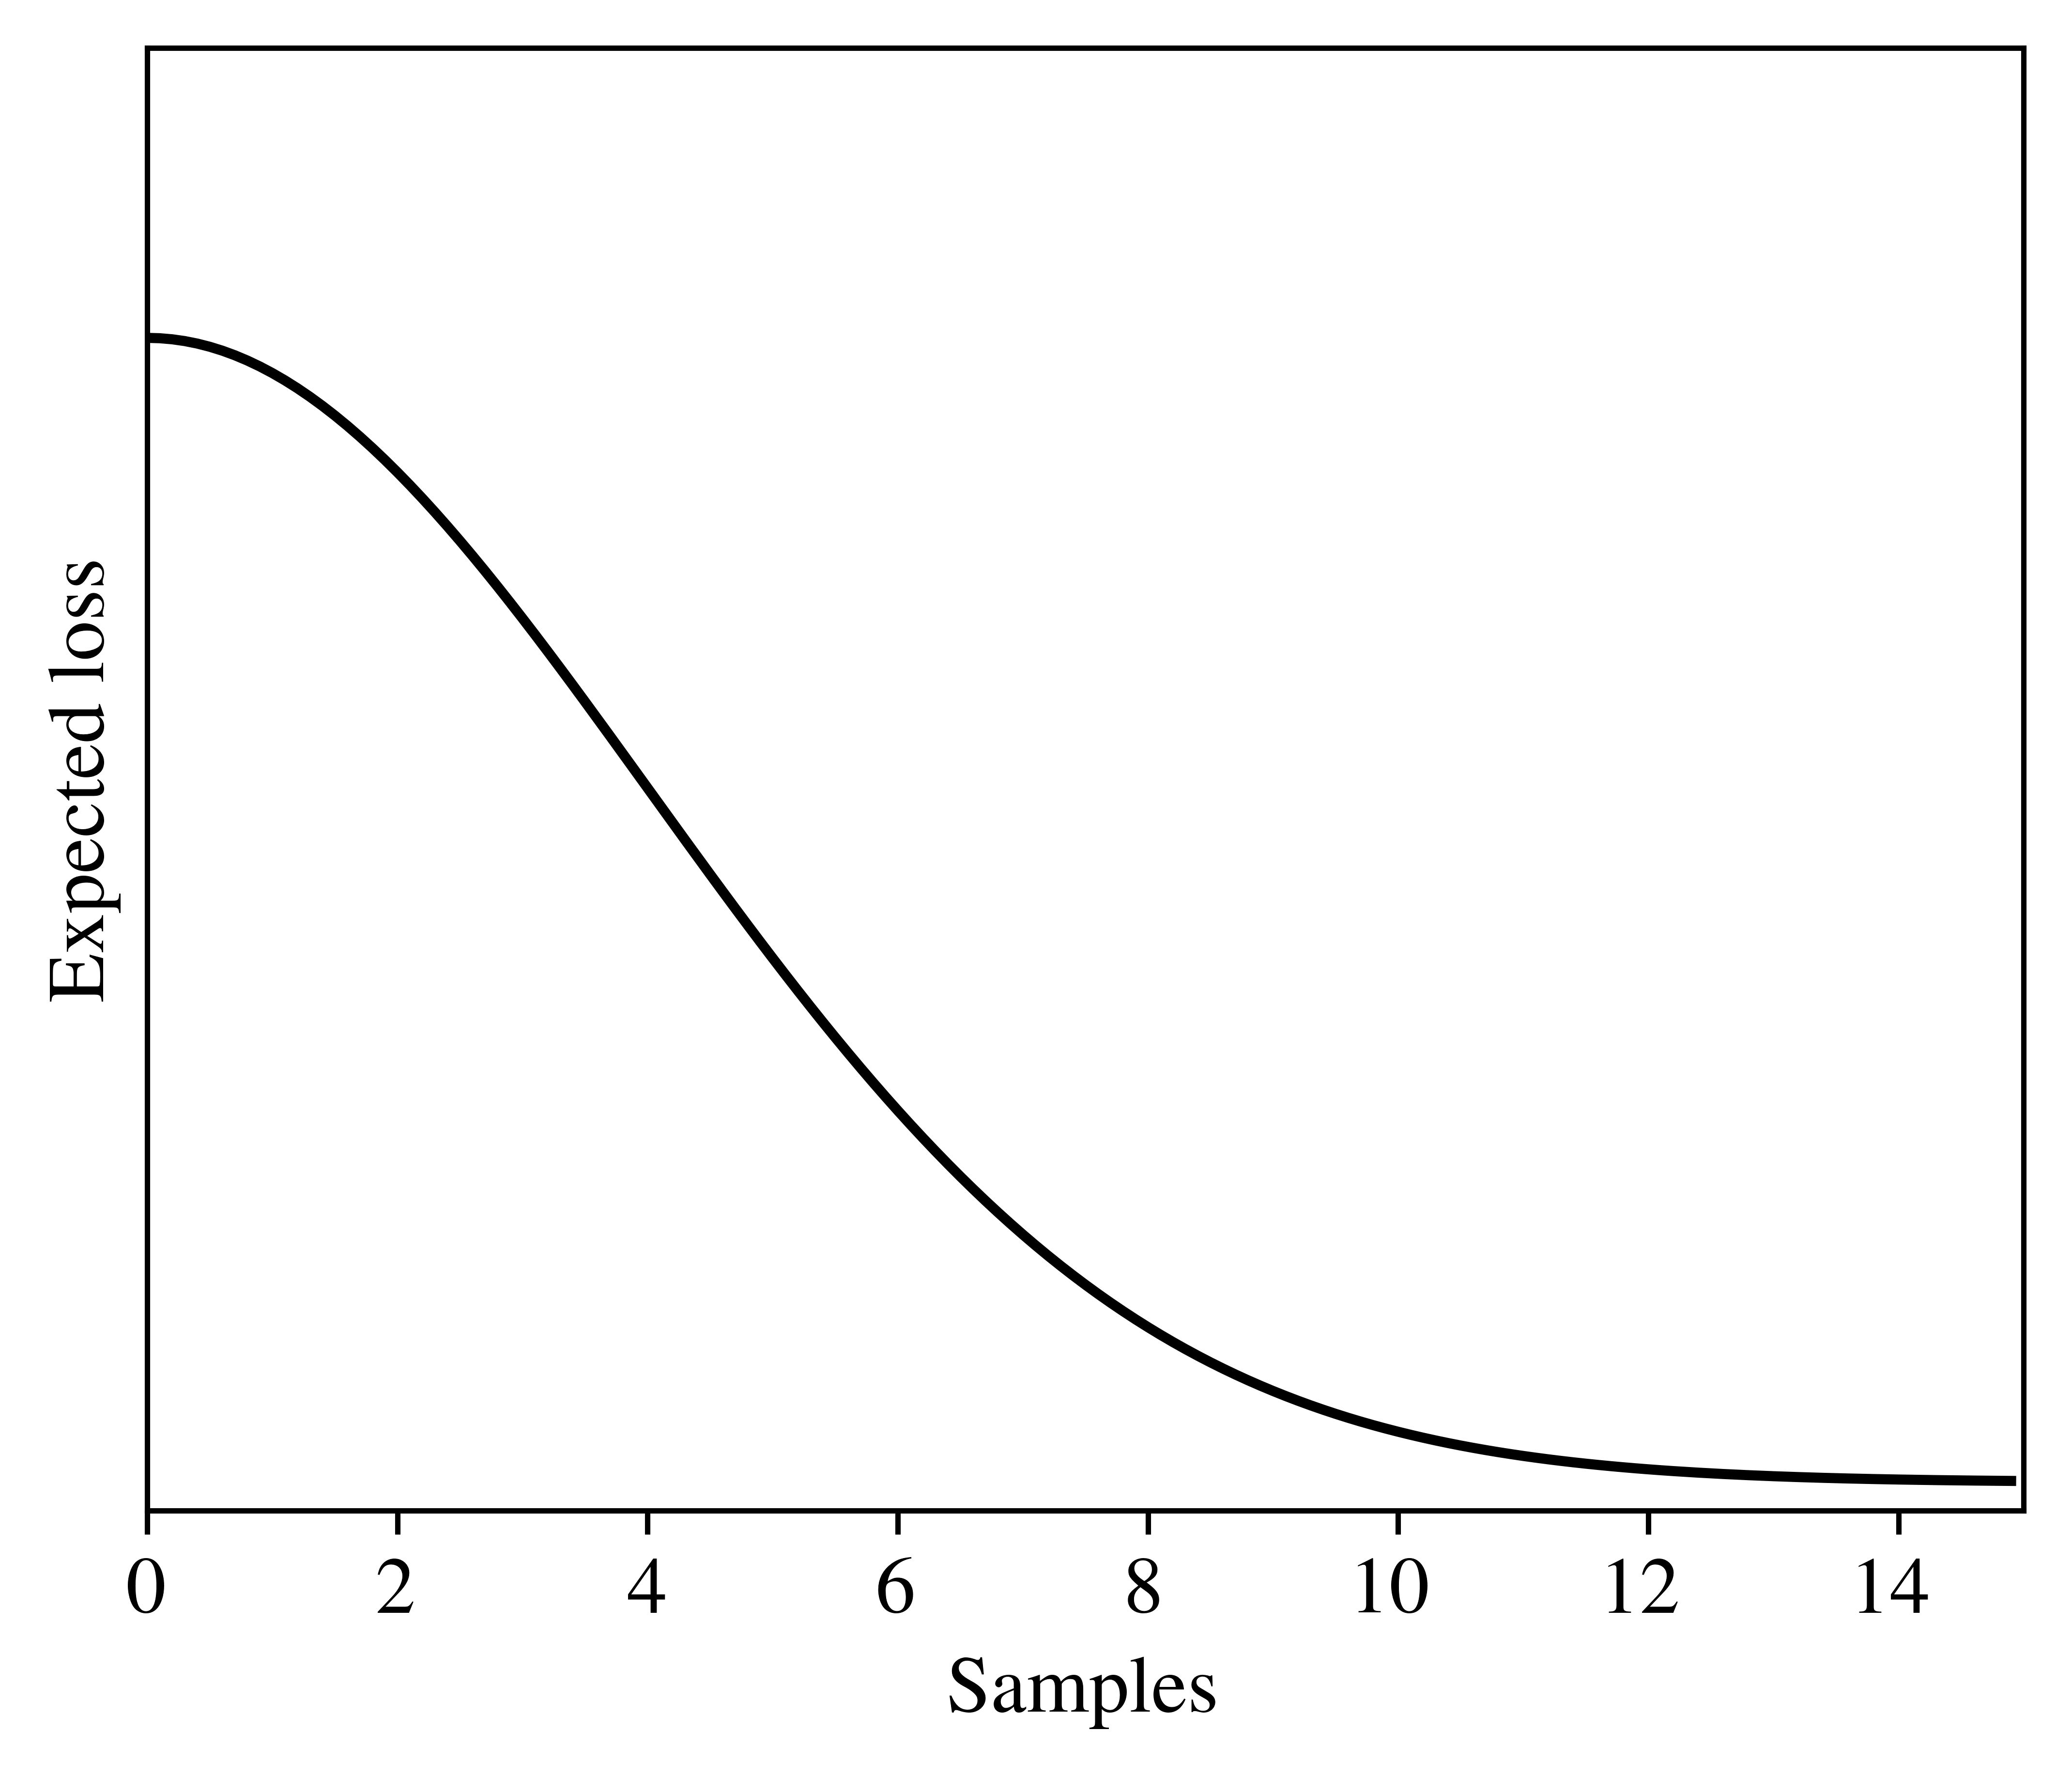

In [3]:
fig = plt.figure(figsize=(5,4), dpi=1000)
# set matching font
fontProperties = {'family':'serif','serif':['Times'],
    'weight' : 'normal', 'size' : 12}
rc('text', usetex=True)
rc('font',**fontProperties)
ax = fig.add_subplot(1,1,1)
ax.set_xlim((0, 15))
ax.set_ylim((-0.01, 0.5))
ax.set_xlabel('Samples')
ax.set_ylabel('Expected loss')
ax.set_yticks([])

dx = 0.1
#x1 = np.arange(0, 2, dx)
#x2 = np.arange(2, 15, dx)
x = np.arange(0, 15, dx)
ax.set_xticks(np.arange(0,15,2))
y2 = norm.pdf((x)*0.25)
ax.plot(x, y2, 'k-');
#ax.plot(x1, y2[0]*np.ones(x1.shape), 'k-')


plt.savefig('figlosspres.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0, transparent=True)

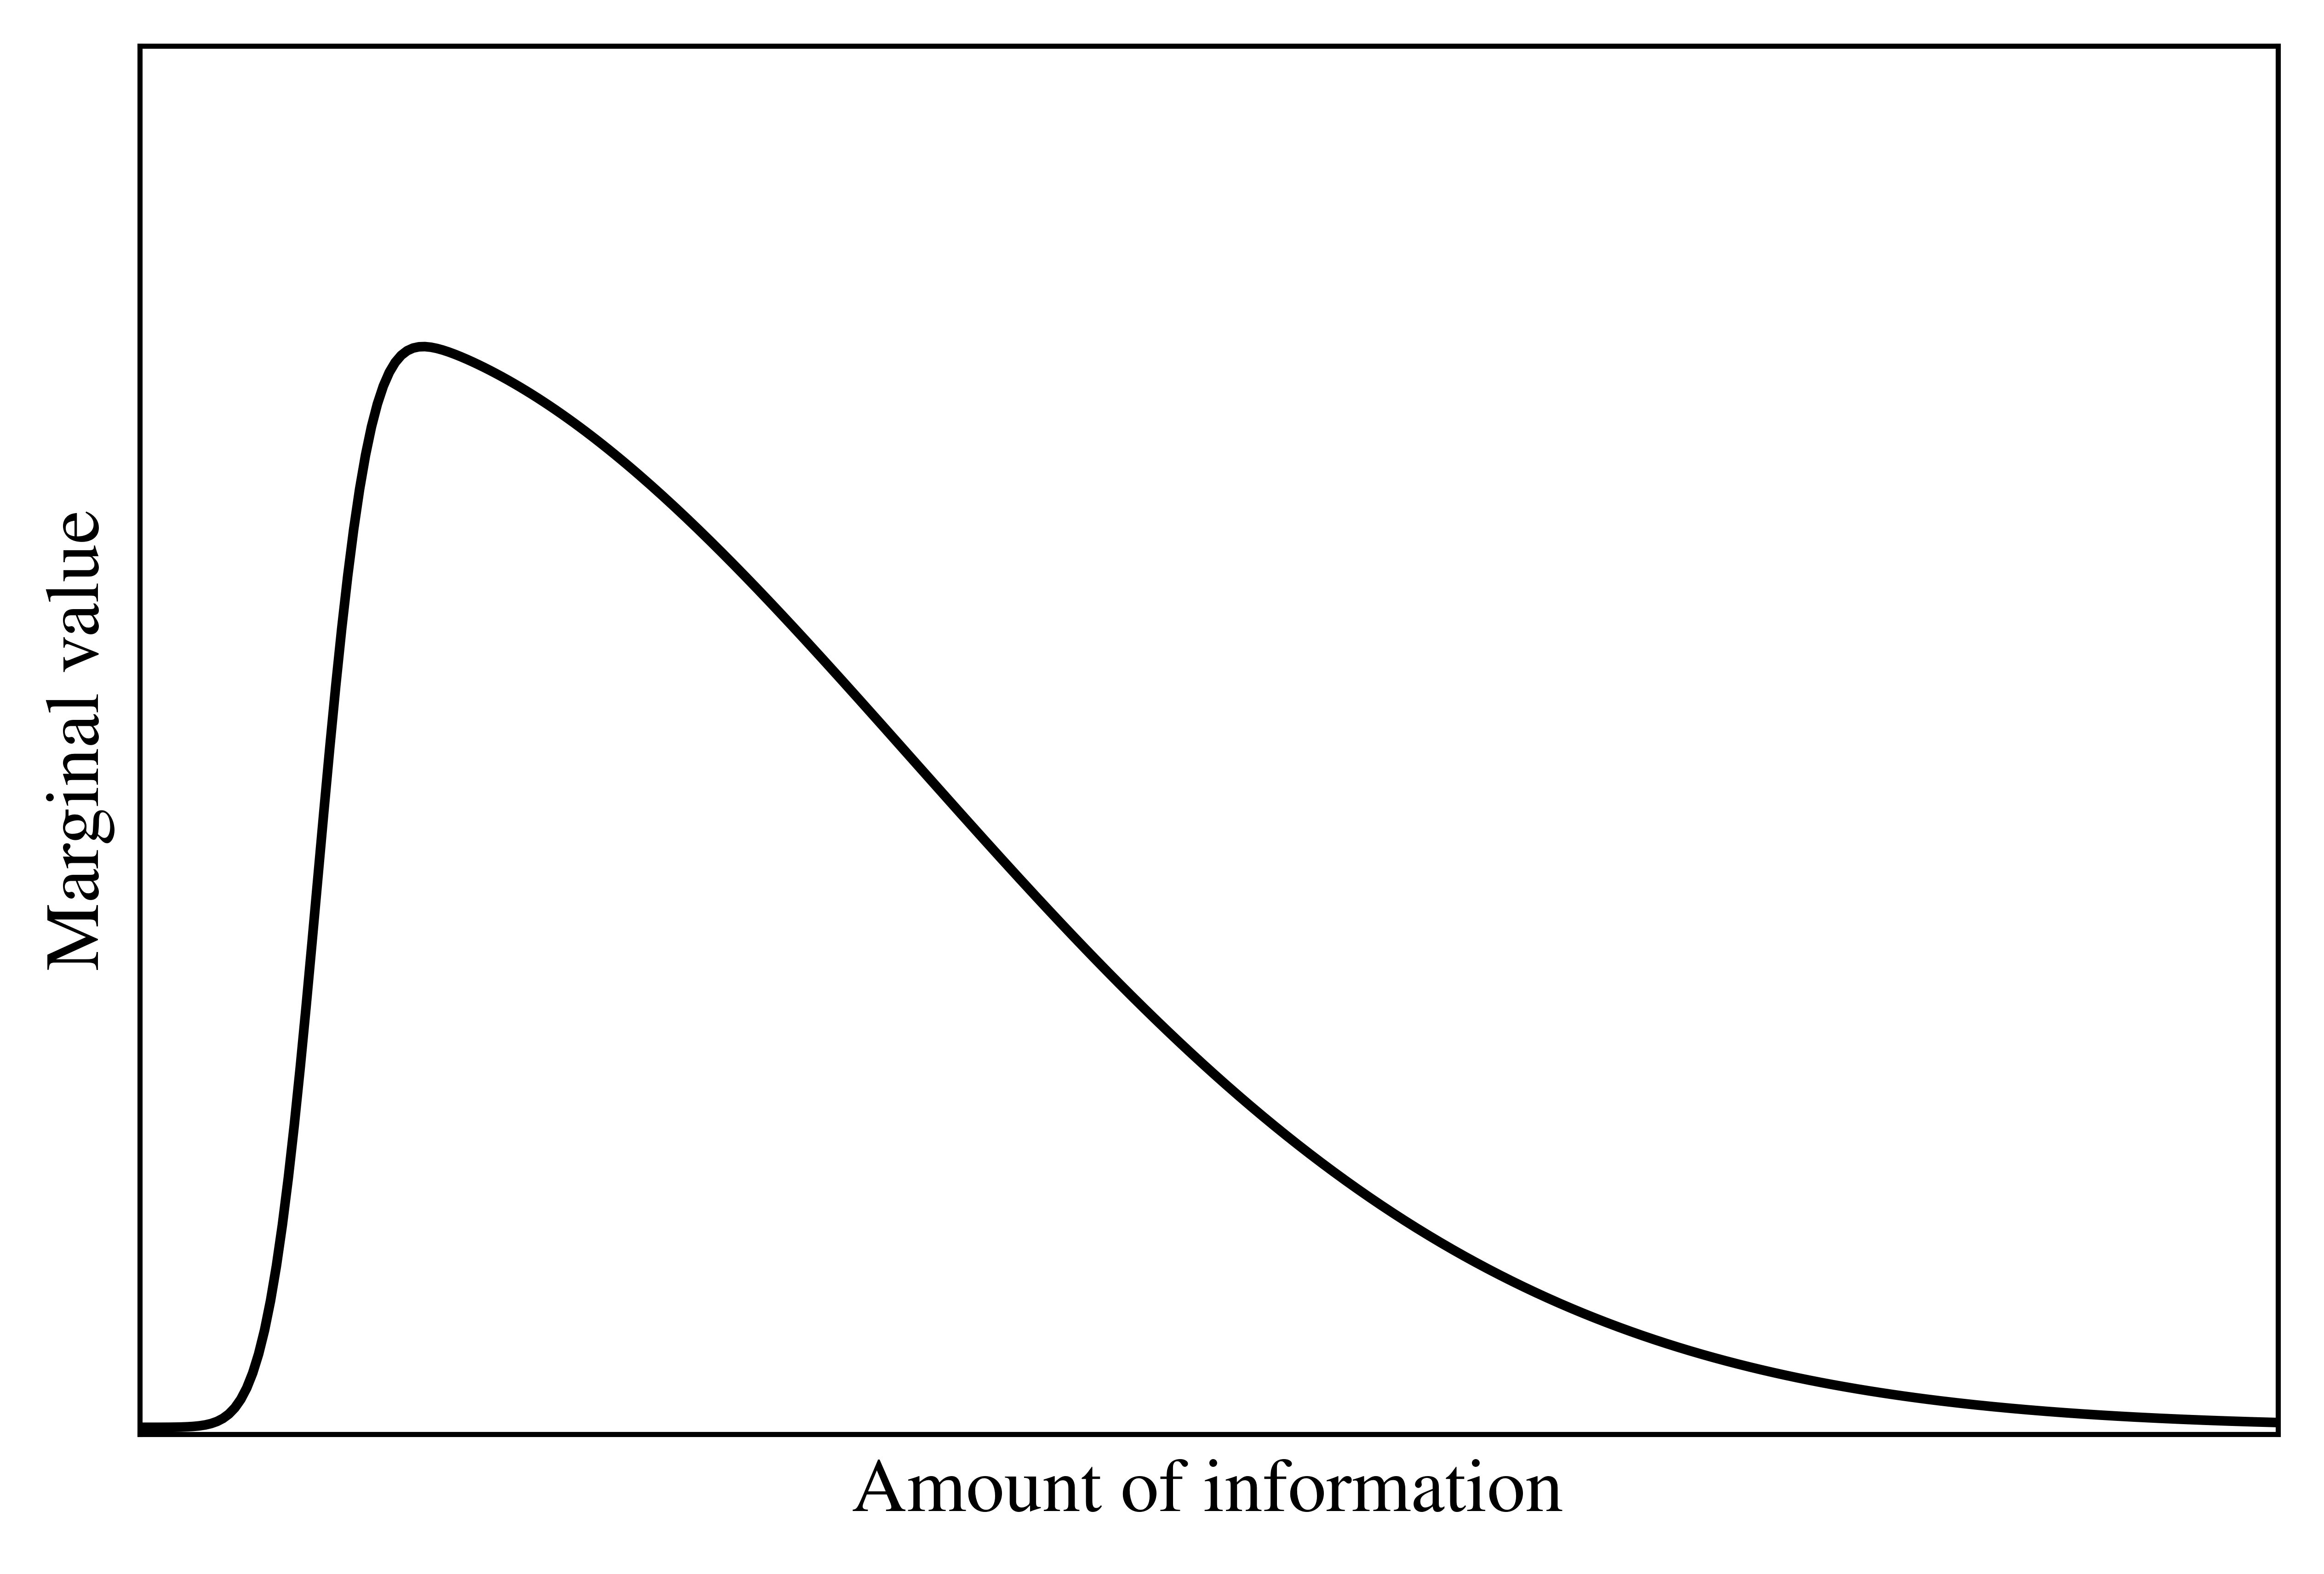

In [4]:
fig = plt.figure(figsize=(6,4), dpi=1000)
# set matching font
fontProperties = {'family':'serif','serif':['Times'],
    'weight' : 'normal', 'size' : 12}
rc('text', usetex=True)
rc('font',**fontProperties)
ax = fig.add_subplot(1,1,1)
ax.set_xlim((4, 40))
ax.set_ylim((-0.005, 1))
ax.set_xlabel('Amount of information')
ax.set_ylabel('Marginal value')
ax.set_yticks([])
ax.set_xticks([])

dx = 0.1
x1 = np.arange(0, 1, dx)
x2 = np.arange(1, 50, dx)
y2 = skewnorm.pdf((x2-7)*0.1,15)
ax.plot(x1, y2[0]*np.ones(x1.shape), 'k')
ax.plot(x2, y2, 'k');


plt.savefig('figradnerpres.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0, transparent=True)